## **Flight Price Prediction**
### **Data Analysis Section**

<>:3: SyntaxWarning: invalid escape sequence '\G'
<>:3: SyntaxWarning: invalid escape sequence '\G'
C:\Users\INTEL\AppData\Local\Temp\ipykernel_24076\4208654732.py:3: SyntaxWarning: invalid escape sequence '\G'
  directory = "D:\Google Bangkit Batch 1 2024"


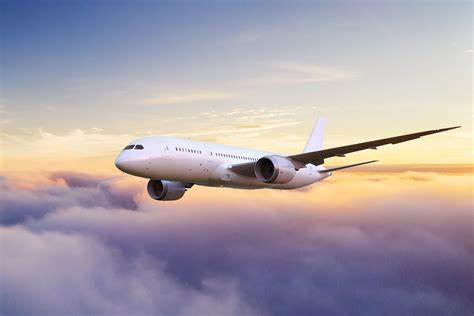

In [2]:
import os
from IPython.display import Image
directory = "D:\Google Bangkit Batch 1 2024"
files = 'airplane.jpeg'
Image(os.path.join(directory,files))

Proyek ini berisi tentang analisis data mengenai penjualan tiket pesawat di India. Dataset didapat dari Kaggle dengan judul yang sama. Berikut adalah link datasetnya : https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

Pengerjaan proyek ini akan dibagi menjadi dua notebook. Notebook pertama akan digunakan khusus untuk analisis data sedangkan notebook kedua akan dibuat untuk pengembangan model prediktif machine learning (coming soon)
Kita akan memulai proyek ini dengan mengimpor modul-modul python yang diperlukan

### **Impor Modul**

In [3]:
import numpy as np
import pandas as pd
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import zipfile

### **Accessing Data**

In [4]:
directory_files = 'D:\Google Bangkit Batch 1 2024\My Project\Flight Price Prediction\Data Source'
dataset = 'archive (6).zip'


#with zipfile.ZipFile(os.path.join(dataset_dir),'r') as zip_ref:
 #   zip_ref.extractall('D:\Google Bangkit Batch 1 2024\My Project\Flight Price Prediction\Data Source')
    

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\INTEL\AppData\Local\Temp\ipykernel_24076\3586571553.py:1: SyntaxWarning: invalid escape sequence '\G'
  directory_files = 'D:\Google Bangkit Batch 1 2024\My Project\Flight Price Prediction\Data Source'


In [5]:
#Kode ini untuk membaca data dengan menggunakan dataframe
clean_dataset = pd.read_csv(os.path.join(directory_files,'Clean_Dataset.csv'))
clean_dataset

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
#Akan dilihat data pda csv clean_dataset
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


### **Cleaning Data**

Pada kolom setelah index, terdapat kolom "Unnamed", karena sepertinya kolom ini tidak terlalu banyak membantu dalam proses analisis data, kita akan melakukan drop.

In [7]:
clean_dataset = clean_dataset.drop(columns=['Unnamed: 0'])
clean_dataset

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Sebelum melakukan EDA, kita akan mengecek tiap file apakah ada data yang bernilai Null dan pengecekan nilai outlier

In [8]:
#akan dicek nilai Null dan nilai NaN pada tiap kolom
pd.isnull(clean_dataset).sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
#akan dicek nilai NaN
pd.isna(clean_dataset).sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Secara singkat, kita akan melihat sekilas statistik deskriptif untuk beberapa parameter numerik, sebagaimana berikut

In [10]:
clean_dataset.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Berdasarkan data, tampak tidak ada outlier. Harga maksimal dari tiket bernlai 123071, lebih besar daripada yang lain. Tapi ini bisa jadi masuk akal karena penerbangan yang jauh dan tipe tiket yang mahal.

In [11]:
clean_dataset['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

### **Exploratory Data Analysis & Data Viz**

Kita akan memvisualisasikan antar kolom untuk mempermudah membaca data. Analisis pertama kita akan mencoba membandingkan harga tiap maskapai penerbangan

In [12]:
compare_airline_price = pd.DataFrame(clean_dataset.groupby(['airline','class'])['price'].mean())
compare_airline_price

price
airline   class                 
AirAsia   Economy    4091.072742
Air_India Business  47131.039212
          Economy    7313.682169
GO_FIRST  Economy    5652.007595
Indigo    Economy    5324.216303
SpiceJet  Economy    6179.278881
Vistara   Business  55477.027777
          Economy    7806.943645

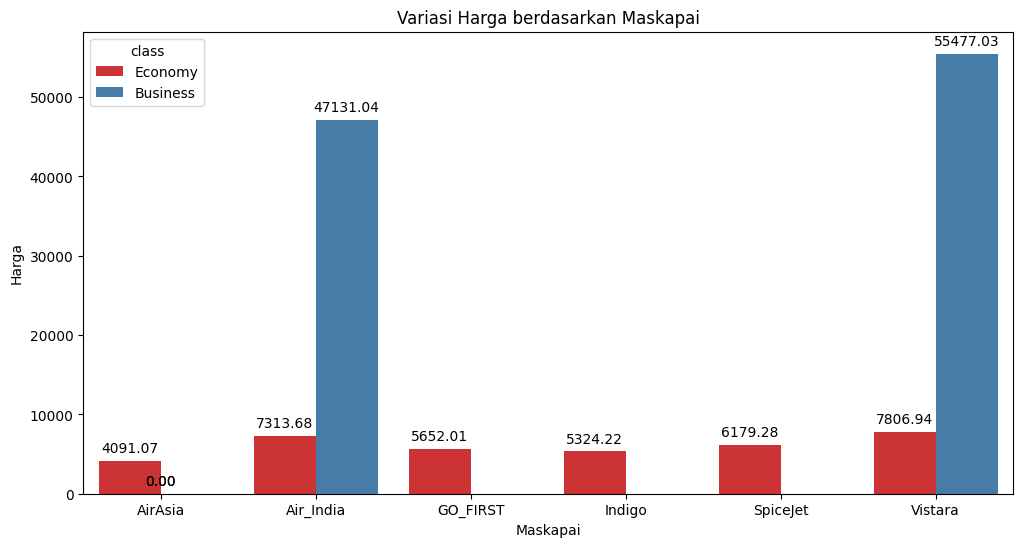

In [13]:
plt.figure(figsize = (12,6),)
barplot = sns.barplot(x='airline',y='price',data = compare_airline_price,hue = 'class',palette ='Set1')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
    (p.get_x() + p.get_width()/2, p.get_height()),
    ha = 'center', va = 'center',
    xytext = (0,9),
    textcoords = 'offset points')
plt.title('Variasi Harga berdasarkan Maskapai')
plt.xlabel('Maskapai')
plt.ylabel('Harga')
plt.show()

Berdasarkan data, dapat dilihat bahwa maskapai "Vistara" memiliki harga paling tinggi untuk tiket pesawat, disusul dengan "Air India". Selanjutnya kita akan melihat pengaruh harga tiket terhadap kota tujuan penerbangan

C:\Users\INTEL\AppData\Local\Temp\ipykernel_24076\1317435647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'destination_city', y ='price', data = clean_dataset, palette = 'Set2')


Text(0, 0.5, 'Harga Tiket')

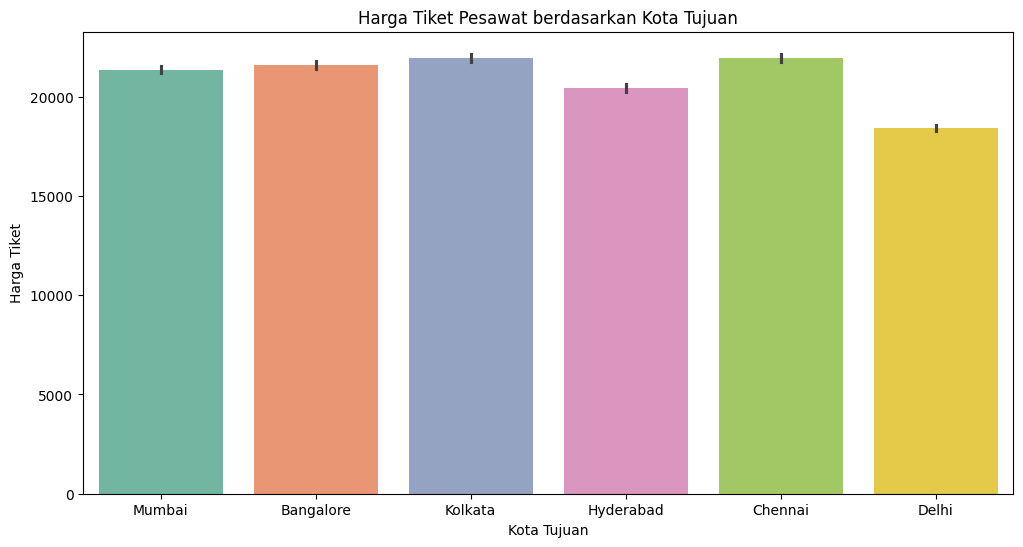

In [27]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'destination_city', y ='price', data = clean_dataset, palette = 'Set2')
plt.title('Harga Tiket Pesawat berdasarkan Kota Tujuan')
plt.xlabel('Kota Tujuan')
plt.ylabel('Harga Tiket')

Kita akan melihat, dalam bulan-bulan terakhir ini, kota mana yang paling banyak dikunjungi oleh penumpang dengan menggunakan pesawat?

  Kota Tujuan  Jumlah Pengunjung
0      Mumbai              59097
1       Delhi              57360
2   Bangalore              51068
3     Kolkata              49534
4   Hyderabad              42726
5     Chennai              40368


Text(0, 0.5, 'Jumlah Pengunjung')

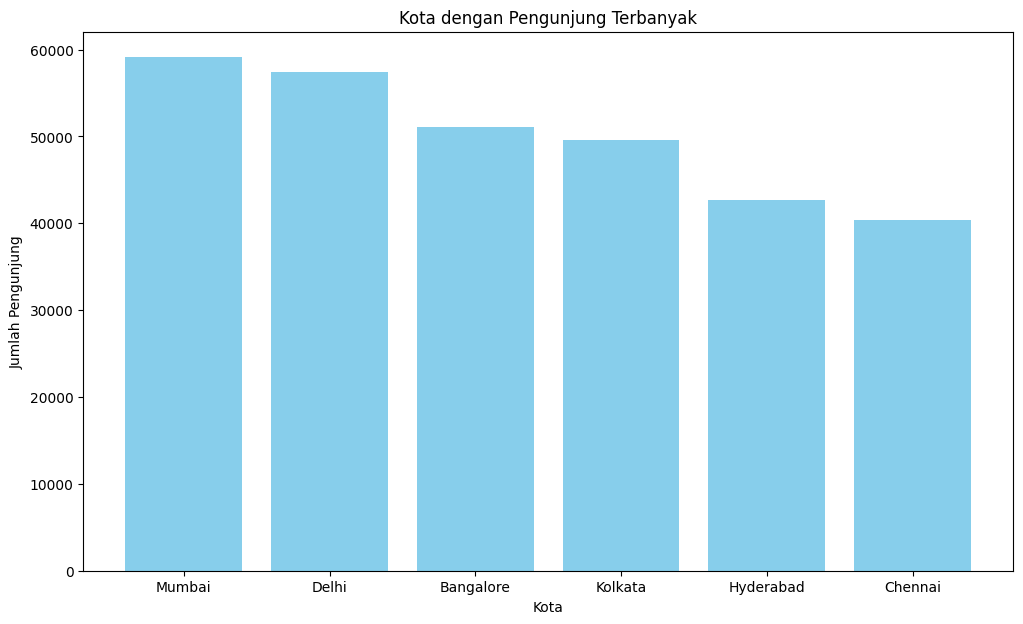

In [15]:
city_vs_passenger = clean_dataset['destination_city'].value_counts().reset_index()
city_vs_passenger.columns = ['Kota Tujuan', 'Jumlah Pengunjung']

print(city_vs_passenger)

#kode program untuk visualisasi data
plt.figure(figsize=(12,7))
plt.bar(city_vs_passenger['Kota Tujuan'], city_vs_passenger['Jumlah Pengunjung'],color='skyblue')
plt.title('Kota dengan Pengunjung Terbanyak')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pengunjung')

Dapat dilihat pada grafik, bahwa kota Mumbai dan Kota Delhi adalah kota yang paling banyak dikunjungi. Dengan jumlah kota Mumbai sebanyak 59097 orang dan kota Delhi 57360 orang. Kota yang memiliki paling sedikit pengunjung adalah kota Chennai dengan jumlah 40368 orang.

Jika sebelumnya kita melihat jumlah pengunjung. Selanjutnya kita akan coba melihat durasi penerbangan dari kota asal ke kota tujuan.

In [16]:
#Fungsi untuk mengubah jam menjadi menit, untuk mempermudah visualisasi
def hour_to_min(time_str):
    h,m = map(int,time_str.split('.'))
    return h * 60 + m

#kita akan apply fungsi tersebut pada kolom durasi
clean_dataset['duration'] = clean_dataset['duration'].apply(str)
clean_dataset['duration'] = clean_dataset['duration'].apply(hour_to_min)



In [17]:
clean_dataset['duration']

0         137
1         153
2         137
3         145
4         153
         ... 
300148    608
300149    642
300150    863
300151    600
300152    608
Name: duration, Length: 300153, dtype: int64

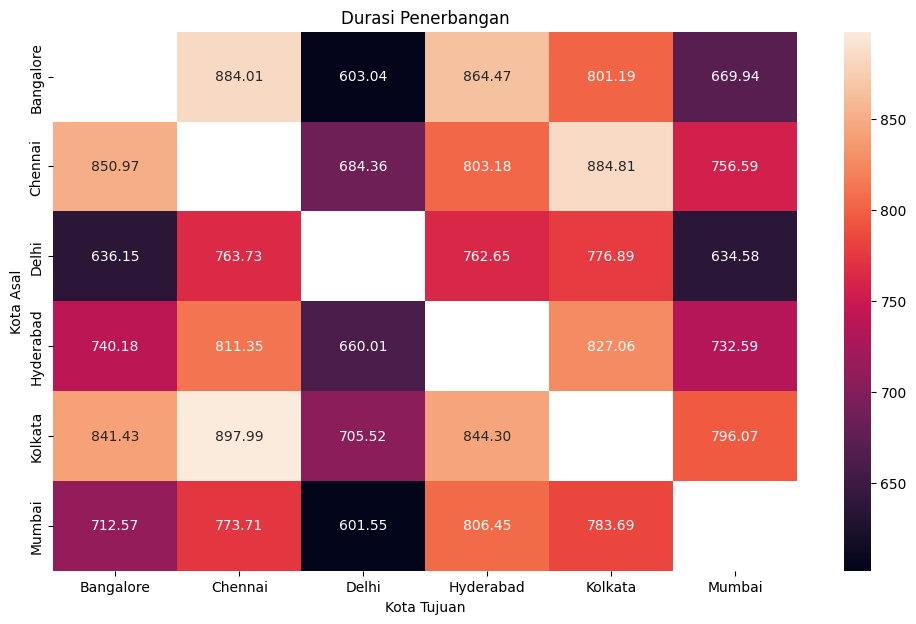

In [18]:
#visualisasi data
source_dest_duration = clean_dataset.groupby(['source_city','destination_city'])['duration'].mean().unstack()

plt.figure(figsize=(12,7))
plt.title('Durasi Penerbangan')
sns.heatmap(source_dest_duration,fmt = ".2f",annot = True, cmap = "rocket")
plt.xlabel('Kota Tujuan')
plt.ylabel('Kota Asal')
plt.show()

Berdasarkan heatmap diatas, kita bisa mengetahui kemungkinan jarak relatif masing-masing kota berdasarkan durasi waktu penerbangan. Penumpang asal Kolkata yang menuju ke Chennai menghabiskan waktu 897 menit / 15 jam 35 menit di pesawat. Hal ini masuk akal, mengingat bahwa waktu perjalanan dari Kolkata ke Chennai sendiri memakan waktu 27 jam 20 menit jika menggunakan kereta api

<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\INTEL\AppData\Local\Temp\ipykernel_24076\2412264613.py:2: SyntaxWarning: invalid escape sequence '\G'
  directory = "D:\Google Bangkit Batch 1 2024"


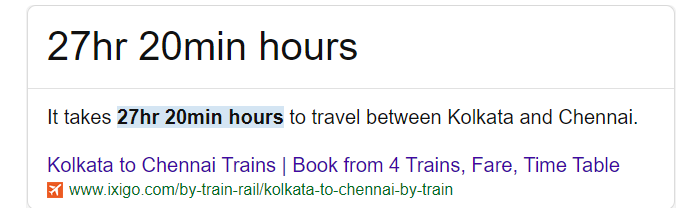

In [19]:
from IPython.display import Image
directory = "D:\Google Bangkit Batch 1 2024"
files = 'random facts for viz.png'
Image(os.path.join(directory,files))

Berikut akan ditampilkan sebuah grafik yang menunjukkan harga tiket pesawat berdasarkan hari keberangkatan

Text(0, 0.5, 'Harga Tiket')

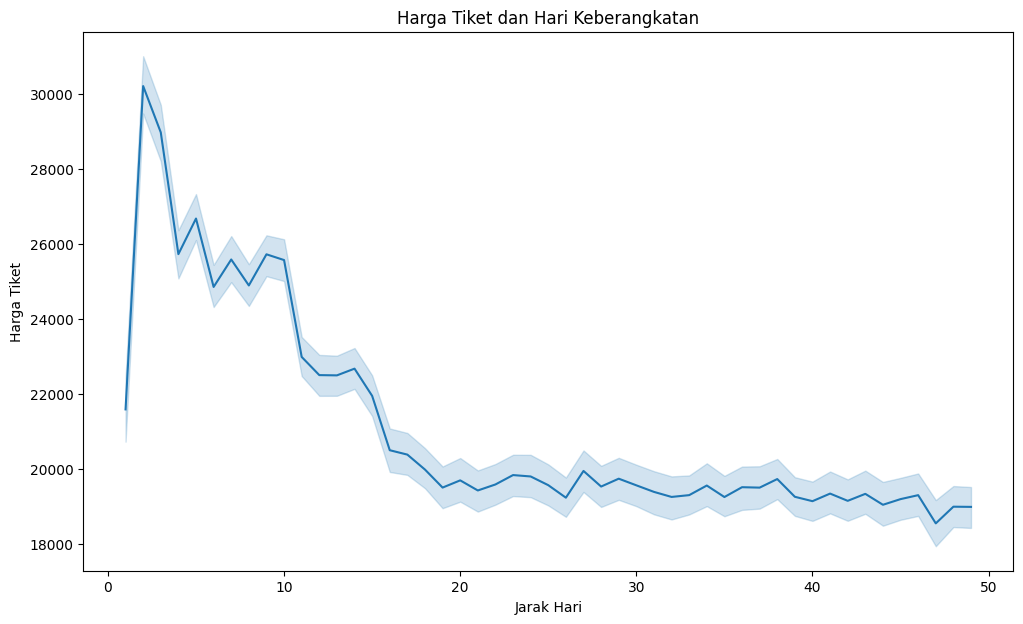

In [20]:
#Visualisasi harga tiket dan jarak antara pembelian tiket dengan hari keberangkatan
plt.figure(figsize=(12,7))
sns.lineplot(x = 'days_left',y='price',data = clean_dataset)
plt.title('Harga Tiket dan Hari Keberangkatan')
plt.xlabel('Jarak Hari')
plt.ylabel('Harga Tiket')

Berdasarkan grafik, bisa dilihat bahwa semakin dekat dengan keberangkatan, harga tiket akan semakin mahal. Semakin jauh jarak pembelian tiket dengan hari keberangkatan, harga tiket akan semakin murah. Untuk lebih memudahkan kita melihat pengaruhnya dalam bentuk angka, kita akan menggunakan regresi linier dan menghitung nilai koefisien yang didapatkan.

In [21]:
from sklearn.linear_model import LinearRegression

x = clean_dataset[['days_left']]
y = clean_dataset['price']

#membuat model regresi
model = LinearRegression()
model.fit(x,y)

#Menampilkan koefisien regresi dan intercept
print("Koefisien:",model.coef_)
print("Intercept:",model.intercept_)


Koefisien: [-153.89910961]
Intercept: 24891.768533903007


Berdasarkan hasil regresi linier, diketahui bahwa jarak pembelian - keberangkatan memiliki hubungan negatif dengan variabel harga. Hal ini masuk akal, apabila diliaht pada grafik semakin dekat hari pembelian tiket dengan hari keberangkatan, semakin mahal harga tiketnya. Nilai intercept menunjukkan apabila variabel x bernilai 0. Dalam hal ini variabel X merupakan hari pembelian tiket dan keberangkatan. Harga tiket jika seseorang membeli tiket di hari-H keberangkatan seharga 24891 Rupee.

Berikutnya, kita akan coba melihat visualisasi data dari pengguna maskapai. Kira-kira maskapai mana yang paling sering digunakan?

     airline  Jumlah Pengguna
0    Vistara           127859
1  Air_India            80892
2     Indigo            43120
3   GO_FIRST            23173
4    AirAsia            16098
5   SpiceJet             9011


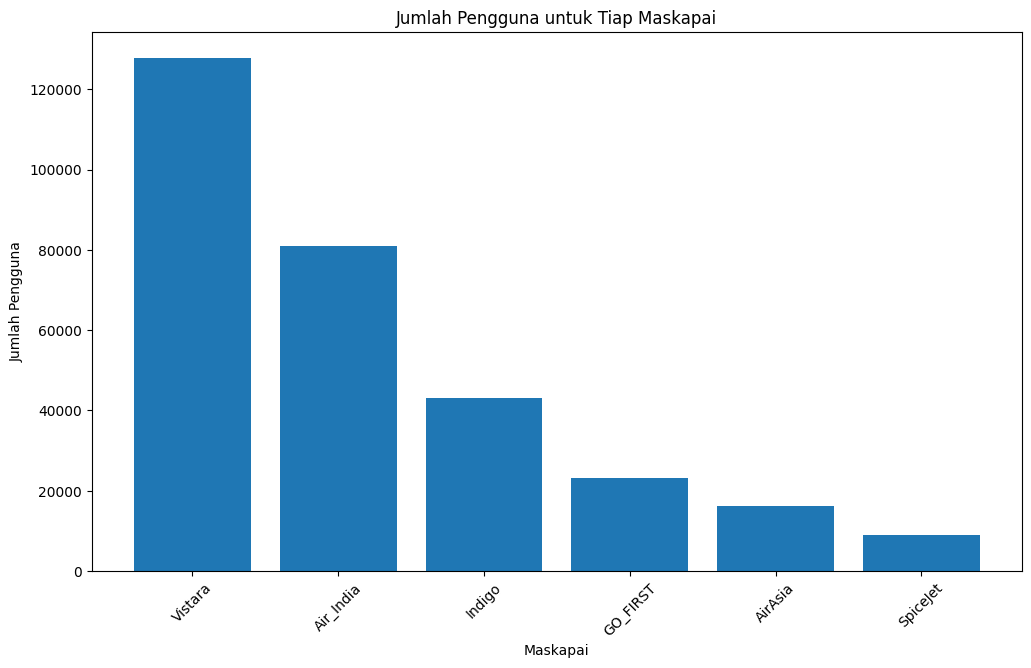

In [22]:
#Menghitung jumlah pengguna untuk tiap maskapai penerbangan
jml_pengguna_per_maskapai = clean_dataset['airline'].value_counts().reset_index()
jml_pengguna_per_maskapai.columns = ['airline', "Jumlah Pengguna"]

print(jml_pengguna_per_maskapai)

#kode program untuk grafik
plt.figure(figsize=(12,7))
plt.bar(jml_pengguna_per_maskapai['airline'], jml_pengguna_per_maskapai['Jumlah Pengguna'])
plt.xlabel('Maskapai')
plt.ylabel('Jumlah Pengguna')
plt.title('Jumlah Pengguna untuk Tiap Maskapai')
plt.xticks(rotation=45)
plt.show()


Berdasarkan grafik, dapat diketahui bahwa maskapai 'Vistara' memiliki jumlah pengguna terbanyak (127859 penumpang) diikuti dengan 'Air India' dengan (80892 penumpang). Maskapai dengan pengguna terendah adalah 'SpiceJet' dengan pengguna sebanyak 9011. Ini menarik, Maskapai dengan harga tiket tertinggi memiliki banyak sekali peminat. 

Berikutnya kita akan melihat harga tiket untuk masing-masing maskapai dengan perbedaan kelas penerbangan

In [23]:
class_flight = pd.DataFrame(clean_dataset.groupby(['airline','class'])['price'].mean())
class_flight

price
airline   class                 
AirAsia   Economy    4091.072742
Air_India Business  47131.039212
          Economy    7313.682169
GO_FIRST  Economy    5652.007595
Indigo    Economy    5324.216303
SpiceJet  Economy    6179.278881
Vistara   Business  55477.027777
          Economy    7806.943645

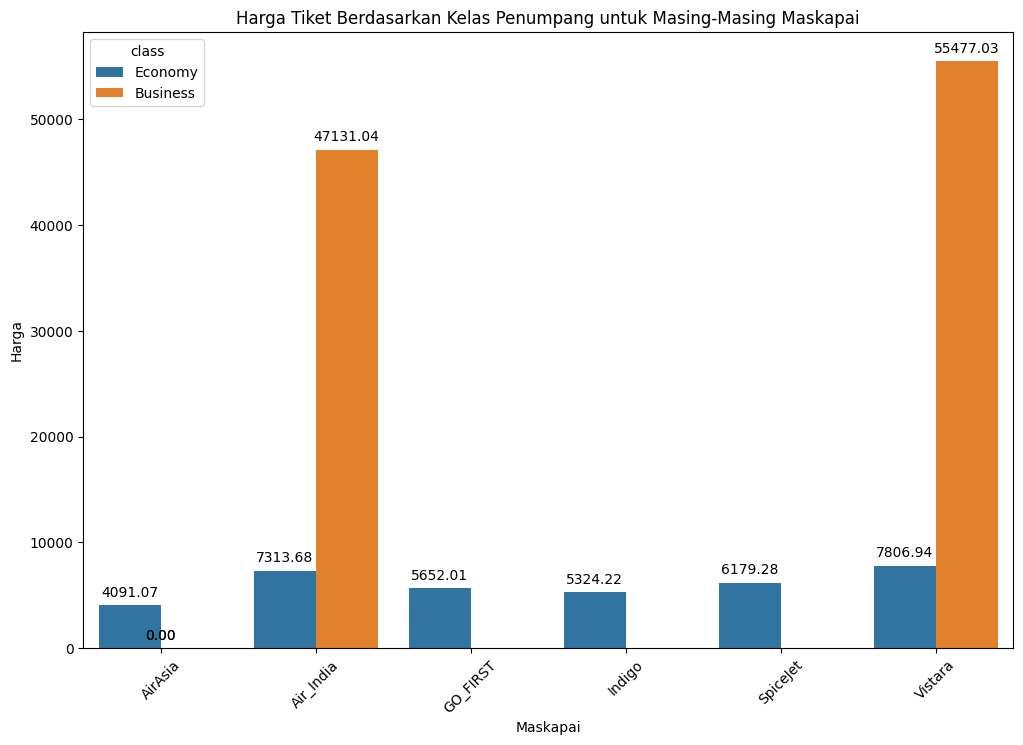

In [24]:
#visualization
plt.figure(figsize = (12,8))
barplot = sns.barplot(x ='airline', y = 'price', hue = 'class', data = class_flight)
plt.title('Harga Tiket Berdasarkan Kelas Penumpang untuk Masing-Masing Maskapai')
#menambahkan anotasi harga pada bar plot
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
    (p.get_x() + p.get_width()/2, p.get_height()),
    ha = 'center', va = 'center',
    xytext = (0,9),
    textcoords = 'offset points')

plt.xlabel('Maskapai')
plt.ylabel('Harga')
plt.xticks(rotation=45)
plt.show()

Data yang akan kita lihat selanjutnya adalah apakah ada pesawat yang singgah di perjalanan dan berapa kali singgah

In [25]:
flight_stops = clean_dataset['stops'].value_counts()
flight_stops.columns = ['Kota Tujuan','Frekuensi Persinggahan']
flight_stops = pd.DataFrame(flight_stops)
flight_stops

,count
stops,
one,250863
zero,36004
two_or_more,13286


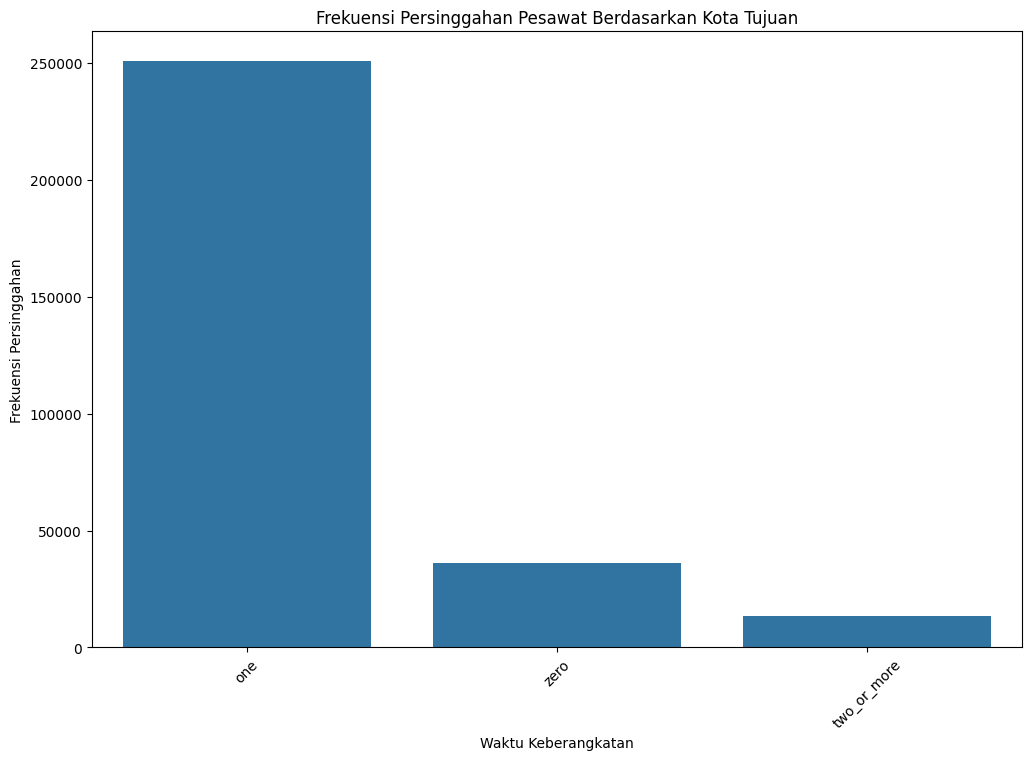

In [26]:
#visualisasi data
plt.figure(figsize = (12,8))
barplot = sns.barplot(x = 'stops', y = 'count',data = flight_stops)
plt.xlabel('Waktu Keberangkatan')
plt.ylabel('Frekuensi Persinggahan')
plt.xticks(rotation=45)
plt.title('Frekuensi Persinggahan Pesawat Berdasarkan Kota Tujuan')
plt.show()

Jika dilihat pada bar plot, banyak pesawat melakukan pemberhentian sebanyak 1 kali. Jumlah pesawat yang melakukan pemberhentian 250863 pesawat. Jumlah pesawat yang tidak melakukan pemberhentian sama sekali 36004 pesawat. Jumlah pesawat yang melakukan pemberhentian sebanyak lebih dari 2 kali yaitu 13286 pesawat.

## **Kesimpulan**

Berdasarkan data, ada beberapa kesimpulan yang bisa kita buat. Sebagai berikut
<ol>
<p>1.Maskapai dengan jumlah pelanggan terbanyak adalah Vistara dengan jumlah penumpang sebanyak 127859 penumpang. Sedangkan jumlah penumpang paling sedikit adalah Spicejet
<p>2.Maskapai yang memiliki kelas bisnis hanya Vistara dan Air India. Tiket termahal yaitu tiket penerbangan Business Class yaitu 55477 Rupee. Vistara juga merupakan maskapai yang memiliki harga tiket pesawat kelas ekonomi termahal, sebesar 7806 Rupee.
<p>3.Berdasarkan dari hasil regresi linier, kita tahu bahwa koefisien yang mempengaruhi harga tiket pesawat yaitu -153.90, bernilai negatif. Hal ini menunjukkan bahwa adanya hubungan yang negatif antara harga tiket dengan hari keberangkatan. Semakin dekat jarak keberangkatan dengan hari pembelian tiket, maka harga tiket akan semakin mahal. 
<p>4.Harga tiket pesawat rata-rata bernilai 24891 Rupee jika tiket dibeli di hari yang sama dengan hari keberangkatan.
<p>5.Durasi rute pesawat terlama adalah pesawat untuk rute Kolkata-Chennai, dengan durasi 897 menit atau sekitar 15 jam 35 menit.
<p>6.Kota dengan pengunjung terbanyak adalah Kota Mumbai dengan jumlah pengunjung 59097 pengunjung. Disusul dengan Kota Delhi dengan jumlah pengunjung terbanyak kedua
<p>7.Pesawat sebanyak 250863 unit melakukan pemberhentian/singgah sebanyak sekali. 
</ol>